For the task of predicting the price of diamond with machine learning, we need to create a machine learning model that will predict the price of a diamond using some features like weight, quality, measurements, etc.The dataset, which I’ll be using for the diamond price prediction task with machine learning, contains data for almost 54,000 diamonds.

Diamond Price Prediction using Python
In this section, I will take you through the task of diamond price prediction with machine learning using Python programming language. Let’s get started with this task by importing the necessary libraries and the dataset:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
#from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

data = pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


There is a column named “table” in the dataset which refers to the flat facet of the diamond as seen when it is face up. The main purpose of this attribute is to refract light rays and allow rays reflected from and inside the diamond to meet the eyes of the observer. The ideal table size of a diamond will give it a stunning look. Now let’s move on to the next step which is data processing.

I will now deal with the data which will include 3 main tasks such as data cleaning, identifying and removing outliers, and encoding categorical features.

The minimum value of “x”, “y”, “z” is zero, this indicates that there are erroneous values in the data which represent dimensionless or two-dimensional diamonds. So we need to filter out which ones are bad data points:

In [2]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

In [3]:
data[data["x"]==0].index

Int64Index([], dtype='int64')

In [4]:

s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [5]:
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])

Finally, let’s have a look at the correlation between the features before training a model for the task of Diamond Price prediction:

<AxesSubplot:>

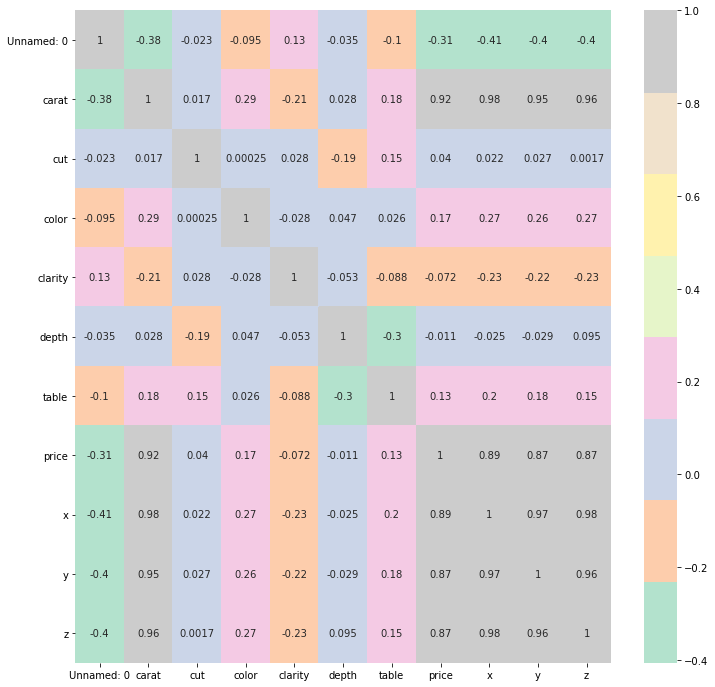

In [6]:

corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap="Pastel2",annot=True)

Observations:
x, y and z show a strong correlation with the target column.
The depth, cut and table columns show a weak correlation. We might consider giving up but let’s keep it.

In [10]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


#pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     #("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1358.129615 
DecisionTree: -39.945706 
RandomForest: -31.127408 
KNeighbors: -669.821907 
